# 简单的DenseNet实现

与ResNet的不同之处在于，DenseNet是按照通道进行拼接而非相加。所以DenseNet的特征会增多，存在较高的过拟合的风险，需要增加一些正则化的手段，如Dropout。

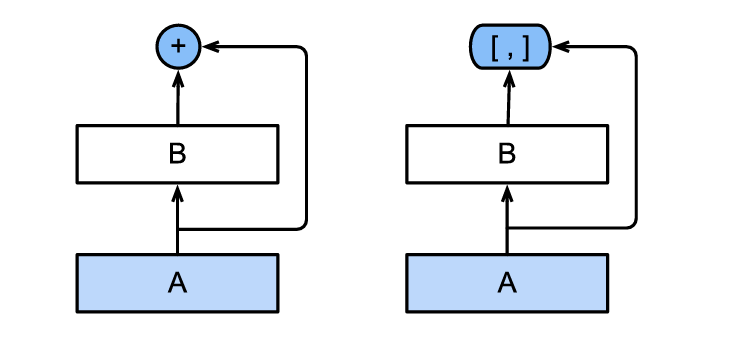

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self,in_planes,out_planes,dropRate):
        super().__init__()
        self.conv1=nn.Conv2d(in_planes,out_planes,3,1,1,bias=False)
        self.relu=nn.ReLU(inplace=True)
        self.bn1=nn.BatchNorm2d(out_planes)
        self.droprate=dropRate
    
    def forward(self,x):
        out=self.conv1(self.relu(self.bn1(x)))
        if self.droprate>0:
            out=F.dropout(out,p=self.droprate,training=self.training)
        return torch.cat([x,out],1)


In [ ]:
#手动模拟随机丢失的代码
#随机丢失要求是一些元素被随机设置为0
#其余元素要放大（1/(1-drop_rate)
#缩放的目的是在训练和测试的时候保持输出的期望不变，数值稳定
def mannual_dropout(x,droprate,training=True):
    if droprate>0 and taining:
        #保留随机数比droprate大的元素，则是true，然后变成1
        mask=(torch.rand_like(x)>droprate).float()
        #将mask乘x,实现随机丢失
        out=x*mask
        #进行缩放保证期望不变
        out=out/(1-droprate)
        print(f"掩码值:\n{mask}")
        print(f"drop后张量:\n{out}")
        print(f"缩放因子:{1/(1-droprate)}")
        return out
    else:
        return x
x=torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0]])
print(f"原始张量:\n{x}")
#应用随机丢失
drop_rate=0.5
print(f"随机丢失的概率:{drop_rate}")
